# **Semanas 11: Aprendizado Supervisionado II**
## **Atividade Semanal**

> Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

In [39]:
# NAO ALTERE OS COMANDOS ABAIXO
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1JaSoegyrIT948qyr0rTBI7tn9auqjP-q'
output = 'dados_energia.csv'
gdown.download(url, output, quiet=True)

dados_energia = pd.read_csv('/content/dados_energia.csv')

In [40]:
display(dados_energia)

,tipo,metragem,ocupantes,eletrodomesticos,temperatura,dia,consumo
0,Residencial,7063,76,10,29.84,Dia Útil,2713.95
1,Comercial,44372,66,45,16.72,Dia Útil,5744.99
2,Industrial,19255,37,17,14.30,Fim de Semana,4101.24
3,Residencial,13265,14,41,32.82,Dia Útil,3009.14
4,Comercial,13375,26,18,11.92,Dia Útil,3279.17
...,...,...,...,...,...,...,...
995,Residencial,14419,68,44,23.95,Fim de Semana,3661.21
996,Industrial,12194,7,22,14.67,Fim de Semana,3546.34
997,Comercial,39562,88,20,32.18,Dia Útil,5147.21
998,Residencial,8348,67,37,16.48,Fim de Semana,3244.98


> Com o objetivo de tornar a distribuição de energia mais eficiente e sustentável, precisamos prever o consumo de energia de novas unidades consumidoras, mesmo antes de entrarem em operação. Para isso, contamos com um banco de dados histórico contendo informações como:
>
> *    o tipo de estabelecimento (residencial, comercial ou industrial),
> *    a metragem do imóvel,
> *    o número de ocupantes,
> *    a quantidade de eletrodomésticos presentes,
> *    a temperatura média do ambiente,
> *    e se o consumo foi registrado em dia útil ou fim de semana.
>
> Com base nessas variáveis, vamos construir modelos que permitam estimar o consumo esperado de energia (em kWh).

###Questão 1

Verifique se há registros duplicados, ausentes ou discrepantes na base. Caso positivo, remova-os.

In [41]:
# Questao 1
dados_energia.duplicated().any()#não há dados duplicados

np.False_

In [42]:
dados_energia.isna().sum()#não há dados ausentes

,0
tipo,0
metragem,0
ocupantes,0
eletrodomesticos,0
temperatura,0
dia,0
consumo,0


In [43]:
dados_energia.describe() # não há dados discrepantes na tabela

,metragem,ocupantes,eletrodomesticos,temperatura,consumo
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


###Questão 2

Após a base limpa e organizada, realize o pré-processamento para a aplicação de um modelo ML.

In [44]:
# Questao 2
#seprando alvos e atributos
alvo='consumo'
atributos=['tipo','metragem','ocupantes','eletrodomesticos','temperatura','dia']

#criando as bases (X,Y)
y=dados_energia[alvo].to_frame()
X=dados_energia[atributos]

#separandos os atributos
atrib_num=['metragem','ocupantes','eletrodomesticos','temperatura']
atrib_cat=['tipo','dia']

#criando bases separadas para X
X_num=dados_energia[atrib_num]
X_cat=dados_energia[atrib_cat]

In [45]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA

# Pipeline para atributos numéricos
num_pipe = Pipeline([
    ('padronizacao', StandardScaler()),
    ('transformacao', PowerTransformer()),
    ('componentes', PCA())
])

# Transformacao para os atributos
atributos_transf = ColumnTransformer([
    # Transformacoes - Atributos numericos
    ('Atributos numericos', num_pipe, atrib_num),
    # Transformacoes - Atributos categoricos
    ('Atributos categoricos', OneHotEncoder(dtype='int', drop='first'), atrib_cat)],
    remainder='drop',
    verbose_feature_names_out=False
)

# Aplicando a transformacao nos atributos
atributos_transf.fit(X)

ColumnTransformer(transformers=[('Atributos numericos',
                                 Pipeline(steps=[('padronizacao',
                                                  StandardScaler()),
                                                 ('transformacao',
                                                  PowerTransformer()),
                                                 ('componentes', PCA())]),
                                 ['metragem', 'ocupantes', 'eletrodomesticos',
                                  'temperatura']),
                                ('Atributos categoricos',
                                 OneHotEncoder(drop='first', dtype='int'),
                                 ['tipo', 'dia'])],
                  verbose_feature_names_out=False)

In [46]:
from sklearn.linear_model import LinearRegression

# Sequenciando as transformacoes necessarias
# para um alvo numérico
alvo_num_rl = TransformedTargetRegressor(
    regressor=LinearRegression(), # Aqui entra o algoritmo para regressão (alvo numérico)
    transformer=num_pipe
)

# Pipeline
pipe_num_rl = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_num_rl)])

In [47]:
# Ativando o modelo
pipe_num_rl.fit(X, y)

Pipeline(steps=[('atributos',
                 ColumnTransformer(transformers=[('Atributos numericos',
                                                  Pipeline(steps=[('padronizacao',
                                                                   StandardScaler()),
                                                                  ('transformacao',
                                                                   PowerTransformer()),
                                                                  ('componentes',
                                                                   PCA())]),
                                                  ['metragem', 'ocupantes',
                                                   'eletrodomesticos',
                                                   'temperatura']),
                                                 ('Atributos categoricos',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int'),
                                                  ['tipo', 'dia'])],
                                   verbose_feature_names_out=False)),
                ('alvo',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=Pipeline(steps=[('padronizacao',
                                                                         StandardScaler()),
                                                                        ('transformacao',
                                                                         PowerTransformer()),
                                                                        ('componentes',
                                                                         PCA())])))])

###Questão 3

Escolha, ao menos, 2 modelos e treine-os utilizando esses dados. Compare visualmente suas previsões.

utilizarei todos os modelos vistos para comparar visualmente as previsões
Utilizarei os modelos:**Regressão de Linear, Regressão de K-vizinhos,Máquinas de Suporte Vetorial,Árvore de Decisão e Redes Neurais**


✅Regressão de Linear

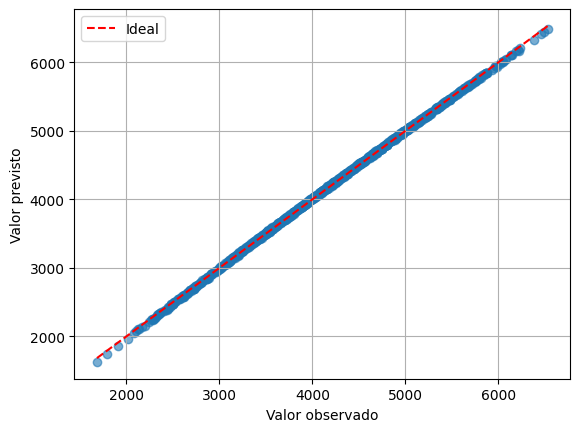

In [88]:
from sklearn.linear_model import LinearRegression

# Sequenciando as transformacoes necessarias
# para um alvo numérico
alvo_num_rl = TransformedTargetRegressor(
    regressor=LinearRegression(), # Aqui entra o algoritmo para regressão (alvo numérico)
    transformer=num_pipe
)

# Pipeline
pipe_num_rl = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_num_rl)])

# Ativando o modelo
pipe_num_rl.fit(X, y)

# Previsao utilizando o modelo 'Regressão linear'
y_prev_rl = pipe_num_rl.predict(X)

# Gráfico de dispersão
import matplotlib.pyplot as plt
plt.scatter(y, y_prev_rl, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Valor observado')
plt.ylabel('Valor previsto')
plt.grid(True)
plt.legend()
plt.show()

✅Regressão de K-vizinhos

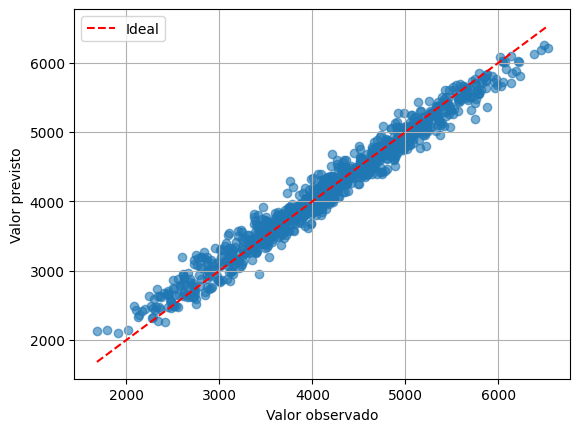

In [61]:
from sklearn.neighbors import KNeighborsRegressor

# Sequenciando as transformacoes necessarias
# para um alvo numérico
alvo_num_kv = TransformedTargetRegressor(
    regressor=KNeighborsRegressor(), # Aqui entra o algoritmo para regressão (alvo numérico)
    transformer=num_pipe
)

# Pipeline
pipe_num_kv = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_num_kv)])

# Ativando o modelo
pipe_num_kv.fit(X, y)

# Previsao utilizando o modelo 'K vizinhos'
y_prev_kv = pipe_num_kv.predict(X)

# Gráfico de dispersão
plt.scatter(y, y_prev_kv, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Valor observado')
plt.ylabel('Valor previsto')
plt.grid(True)
plt.legend()
plt.show()

✅Máquinas de Suporte Vetorial

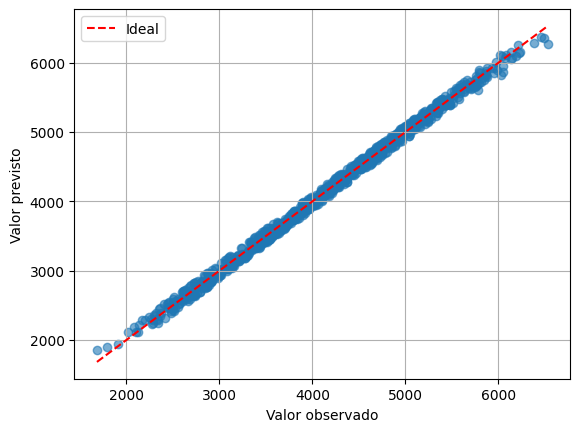

In [63]:
from sklearn.svm import SVR

# Sequenciando as transformacoes necessarias
# para um alvo numérico
alvo_num_sv = TransformedTargetRegressor(
    regressor=SVR(), # Aqui entra o algoritmo para regressão (alvo numérico)
    transformer=num_pipe
)

# Pipeline
pipe_num_sv = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_num_sv)])

# Ativando o modelo
pipe_num_sv.fit(X, y)

# Previsao utilizando o modelo 'SVM'
y_prev_sv = pipe_num_sv.predict(X)

# Gráfico de dispersão
plt.scatter(y, y_prev_sv, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Valor observado')
plt.ylabel('Valor previsto')
plt.grid(True)
plt.legend()
plt.show()

✅Árvore de Decisão

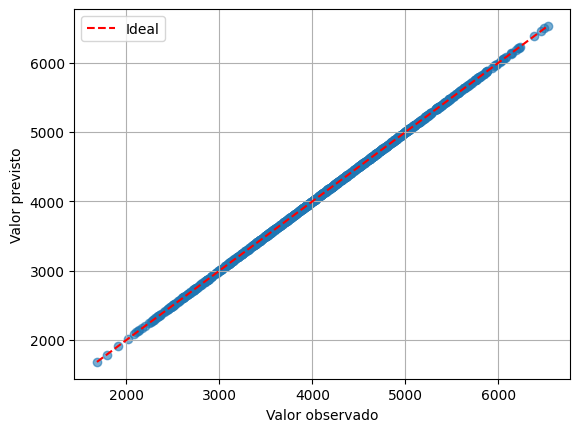

In [64]:
from sklearn.tree import DecisionTreeRegressor
# Sequenciando as transformacoes necessarias
# para um alvo numérico
alvo_num_ad = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(), # Aqui entra o algoritmo para regressão (alvo numérico)
    transformer=num_pipe
)

# Pipeline
pipe_num_ad = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_num_ad)])

# Ativando o modelo
pipe_num_ad.fit(X, y)

# Previsao utilizando o modelo 'Árvore de Decisão'
y_prev_ad = pipe_num_ad.predict(X)

# Gráfico de dispersão
plt.scatter(y, y_prev_ad, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Valor observado')
plt.ylabel('Valor previsto')
plt.grid(True)
plt.legend()
plt.show()

✅Redes Neurais

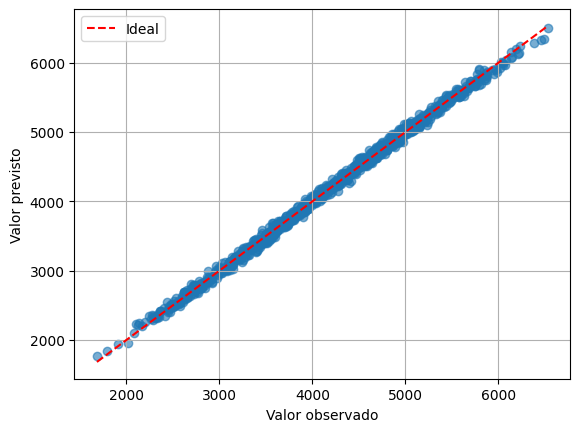

In [65]:
from sklearn.neural_network import MLPRegressor

# Sequenciando as transformacoes necessarias
# para um alvo numérico
alvo_num_rn = TransformedTargetRegressor(
    regressor=MLPRegressor(), # Aqui entra o algoritmo para regressão (alvo numérico)
    transformer=num_pipe
)

# Pipeline
pipe_num_rn = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_num_rn)])

# Ativando o modelo
pipe_num_rn.fit(X, y)

# Previsao utilizando o modelo 'Rede Neural'
y_prev_rn = pipe_num_rn.predict(X)

# Gráfico de dispersão
plt.scatter(y, y_prev_rn, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Valor observado')
plt.ylabel('Valor previsto')
plt.grid(True)
plt.legend()
plt.show()

Observando todas as previsões juntas

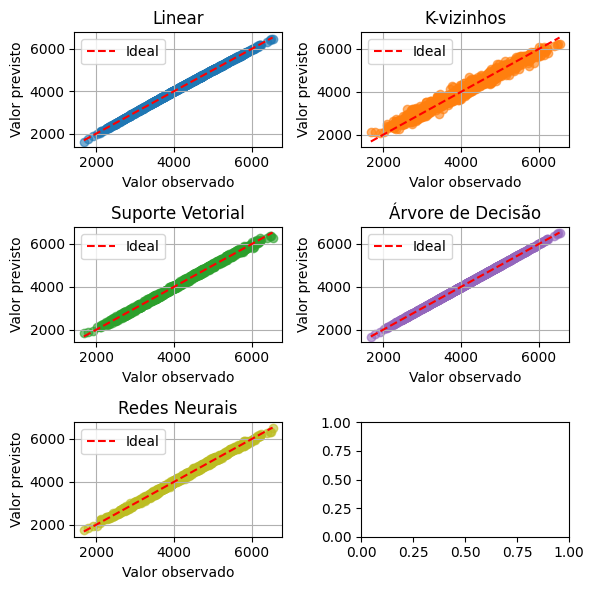

In [93]:
# Criar 6 scatter plots em uma grade 3x2
fig, axs = plt.subplots(3, 2, figsize=(6, 6))
axs = axs.flatten()

# Lista das previsoes feitas por cada modelo
y_preds = [y_prev_rl, y_prev_kv, y_prev_sv, y_prev_ad, y_prev_rn]
nomes = ['Linear', 'K-vizinhos', 'Suporte Vetorial', 'Árvore de Decisão', 'Redes Neurais']
cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive']

for i in range(5):
    axs[i].scatter(y, y_preds[i], alpha=0.6, color=cores[i])
    axs[i].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
    axs[i].set_title(nomes[i])
    axs[i].set_xlabel('Valor observado')
    axs[i].set_ylabel('Valor previsto')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

Visualmente apenas podemos perceber que todos os modelos estão bem parecidos

###Questão 4

Para fins de planejamento, precisamos prever qual será o consumo esperado de uma nova unidade com as seguintes características:
*     Tipo: 'Comercial'
*     Metragem: 60000 m²
*     Ocupantes: 100 estações de trabalho
*     Eletrodomesticos: 125 eletrodomésticos plugados

Tanto para dias úteis quanto para fins de semana.

E também durante as estações:
*    Inverno com temperatura média de 12°C
*    Verão com temperatura média de 29°C

O consumo esperado é maior durante qual estação? A previsão do modelo faz sentido?

> OBS.: Utilize o modelo que você julga mais adequado.

In [87]:
import pandas as pd

# Questao 4 - criando novos dados
X_novo = pd.DataFrame({
    'tipo': ['Comercial', 'Comercial', 'Comercial', 'Comercial'],
    'metragem': [60000, 60000, 60000, 60000],
    'ocupantes': [100, 100, 100, 100],
    'eletrodomesticos': [125, 125, 125, 125],
    'dia': ['Dia Útil', 'Dia Útil', 'Fim de Semana', 'Fim de Semana'],
    'temperatura': [12, 29, 12, 29]
})

## Previsão utilizando o modelo 'Regressão linear'
print('Utilizando o modelo de Regressão linear')
y_prev_rl_novo = pipe_num_rl.predict(X_novo) # Fazendo a previsão

for i, (valor, dia, temp) in enumerate(zip(y_prev_rl_novo.flatten(), X_novo['dia'], X_novo['temperatura']), 1): # Imprimindo os resultados com dia e temperatura
    print(f"O consumo previsto no {dia} com temperatura de {temp}°C foi de {valor:,.2f} kWh ")

## Previsao utilizando o modelo 'k-vizinhos'
print('\n Utilizando o modelo de k-vizinhos')

y_prev_kv_novo = pipe_num_kv.predict(X_novo)
for i, (valor, dia, temp) in enumerate(zip(y_prev_kv_novo.flatten(), X_novo['dia'], X_novo['temperatura']), 1): # Imprimindo os resultados com dia e temperatura
    print(f"O consumo previsto no {dia} com temperatura de {temp}°C foi de {valor:,.2f} kWh ")

# Previsao utilizando o modelo 'SVM'
print('\n Utilizando o modelo de SVM')

y_prev_sv_novo = pipe_num_sv.predict(X_novo)
for i, (valor, dia, temp) in enumerate(zip(y_prev_sv_novo.flatten(), X_novo['dia'], X_novo['temperatura']), 1): # Imprimindo os resultados com dia e temperatura
    print(f"O consumo previsto no {dia} com temperatura de {temp}°C foi de {valor:,.2f} kWh ")

# Previsao utilizando o modelo 'Árvore de Decisão'
print('\n Utilizando o modelo de Árvore de Decisão')
y_prev_ad_novo = pipe_num_ad.predict(X_novo)
for i, (valor, dia, temp) in enumerate(zip(y_prev_ad_novo.flatten(), X_novo['dia'], X_novo['temperatura']), 1): # Imprimindo os resultados com dia e temperatura
    print(f"O consumo previsto no {dia} com temperatura de {temp}°C foi de {valor:,.2f} kWh ")


# Previsao utilizando o modelo 'Rede Neural'
print('\n Utilizando o modelo de Rede Neural')
y_prev_rn_novo = pipe_num_rn.predict(X_novo)

for i, (valor, dia, temp) in enumerate(zip(y_prev_rn_novo.flatten(), X_novo['dia'], X_novo['temperatura']), 1): # Imprimindo os resultados com dia e temperatura
    print(f"O consumo previsto no {dia} com temperatura de {temp}°C foi de {valor:,.2f} kWh ")


Utilizando o modelo de Regressão linear
O consumo previsto no Dia Útil com temperatura de 12°C foi de 8,406.57 kWh 
O consumo previsto no Dia Útil com temperatura de 29°C foi de 8,328.04 kWh 
O consumo previsto no Fim de Semana com temperatura de 12°C foi de 8,358.00 kWh 
O consumo previsto no Fim de Semana com temperatura de 29°C foi de 8,279.44 kWh 

 Utilizando o modelo de k-vizinhos
O consumo previsto no Dia Útil com temperatura de 12°C foi de 5,753.61 kWh 
O consumo previsto no Dia Útil com temperatura de 29°C foi de 5,510.16 kWh 
O consumo previsto no Fim de Semana com temperatura de 12°C foi de 5,761.10 kWh 
O consumo previsto no Fim de Semana com temperatura de 29°C foi de 5,593.79 kWh 

 Utilizando o modelo de SVM
O consumo previsto no Dia Útil com temperatura de 12°C foi de 4,195.34 kWh 
O consumo previsto no Dia Útil com temperatura de 29°C foi de 4,195.14 kWh 
O consumo previsto no Fim de Semana com temperatura de 12°C foi de 4,195.29 kWh 
O consumo previsto no Fim de Seman

De acordo com os valores em todos os modelos (Regressão Linear, k-Vizinhos, SVM, Árvore de Decisão e Rede Neural),podemos observar que:

O consumo é maior com temperaturas mais baixas (12°C) do que com temperaturas mais altas (29°C), tanto em dias úteis quanto em fins de semana.podemos concluir que o consumo esperado é maior no inverno.

Essa tendência é observada em todos os modelos, apesar das diferenças absolutas nos valores previstos.